<a href="https://colab.research.google.com/github/tuomaseerola/music21/blob/master/corpus_analysis_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Music21 Corpus Analysis

**Music and Science**

February 2022, Tuomas Eerola, Durham University, UK.

This is a companion to the first `music21` demo. The Colab ([Google Colaboratory](http://colab.research.google.com/) idea is from Myke Cuthbert, which allows any computer to run `music21` analyses without fuss in a browser window. These demos have been built around the examples provided in `music21` [Documentation](http://web.mit.edu/music21/doc/index.html).


## 1 Build music21 environment in Colab

First we build a virtual machine that will be able run _music21_ in our browser.


### 1.1 Install Music21 and other elements needed to run the environment

Press play and wait for all commands to be executed - this intiial command might take some time as it needs to build the music21 environment.

In [1]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

     |████████████████████████████████| 19.2 MB 1.4 MB/s 
  Created wheel for music21: filename=music21-7.1.0-py3-none-any.whl size=21912607 sha256=f9da3b5e2aa5b8f577aed50a4444ab47585ccc74902bca146ad9e1b6468eb848
  Stored in directory: /root/.cache/pip/wheels/98/3c/67/9e30a8a4c3ac934068c95d2c27e38e1b5e5016a9257dbbf5d0
Successfully built music21
  Attempting uninstall: music21
    Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://d

### 1.2 Let's check out that our environment works

We will do this by trying to import one of the scores available in the music21 corpus. A list of available scores can be found at http://web.mit.edu/music21/doc/about/referenceCorpus.html 


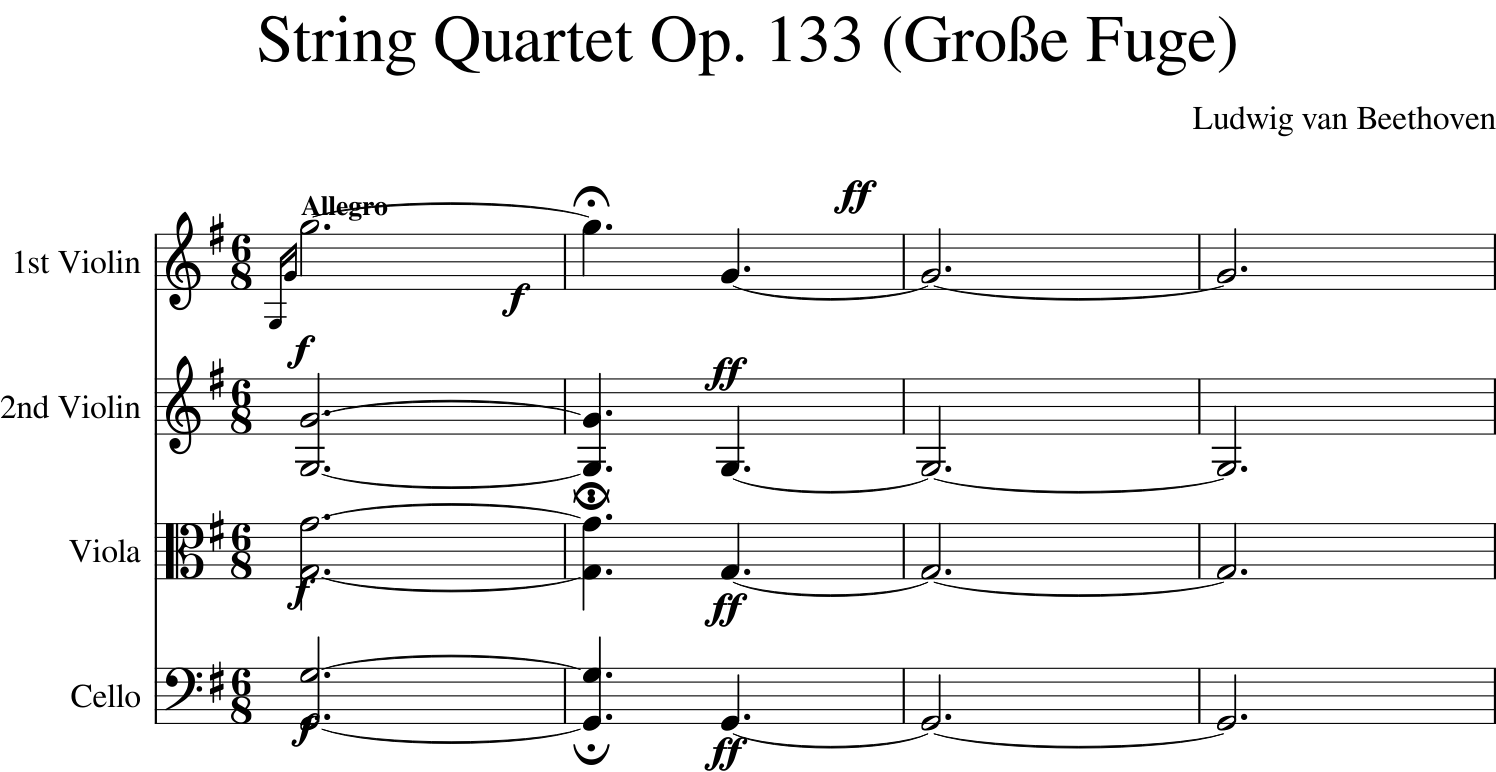

In [2]:
from music21 import *
opus133 = corpus.parse('beethoven/opus133.mxl') # We "parse" one specific work from the corpus which in this case will be a work by Beethoven
opus133.measures(1, 4).show() # This command lets us specify the number of bars (measures) we want to display, in this case we want to see bars 1 to 4

## 2 Corpus analysis
In the previous seminar we got to know `music21` and extracted some interesting musical properties from single pieces of music. Now it is time to apply the analyses to a corpus, a collection of pieces. We will also follow a simillar structure to our last seminar, where we will be trying out different functions to analyse a corpus, and carrying out some learning tasks.

### 2.1 Metadata of a work
Let's work with the built-in corpus of *Music21*. The system has a neat architecture for searching, combining, and loading all pieces that have certain metadata. Also, it is typical that the pieces themselves contain different types of metadata.

In [3]:
# What other information besides the score do we have about a piece of music? Let's try this out first with one work.
opus3no1 = corpus.parse('corelli/opus3no1/1grave') # Let's import one movement of Corelli's Opus 3 work
print(opus3no1.metadata.all()) # This function will allow us to see the work's metadata 


[('arranger', 'Michael Scott Cuthbert'), ('composer', 'Arcangelo Corelli'), ('copyright', '© 2014, Creative Commons License (CC-BY)'), ('movementName', 'Sonata da Chiesa, No. I (opus 3, no. 1)')]


In [4]:
partStream = opus3no1.parts.stream() # Show the list of instruments
for p in partStream:
    print(p.id)

Violino I.
Violino II.
Violone e Organo



## Learning Task 1

Let's now look at the first four bars of the work. Do you remember which command you need to use to do this? NB: The object's name is `opus3no1`.

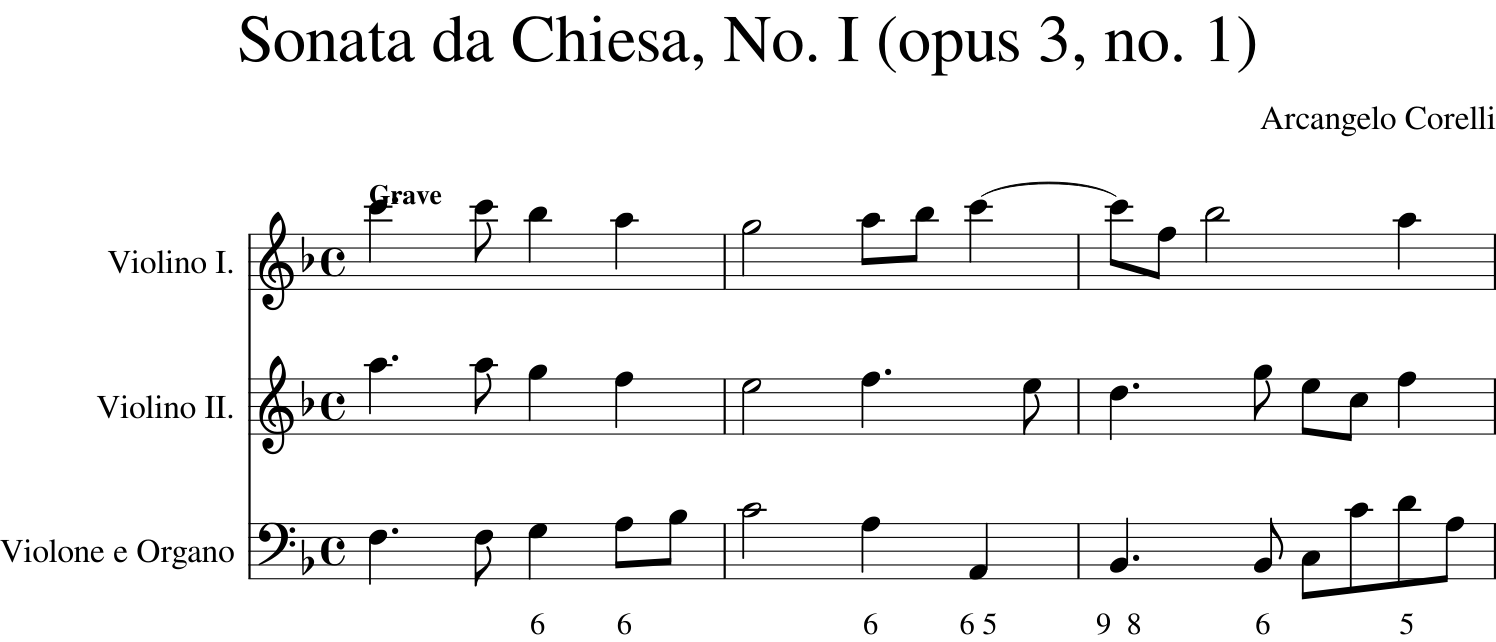

In [6]:
opus...       # Fill in the code to show the first four bars of the work we just loaded from Music21's built-in corpus.

# 2.2 Corpus and metadata

Let's pull up the metadata of a collection of works. First, we will search for all works by a particular composer (works that are available in the `Music21` library, see [Reference Corpus in Music21](https://web.mit.edu/music21/doc/about/referenceCorpus.html)).

In [7]:
# Let's select a corpus of all works composed by Giovanni Palestrina
corpusPalestrina = corpus.search(composer='palestrina')
print(corpusPalestrina) # let's see how many works there are

<music21.metadata.bundles.MetadataBundle {1318 entries}>


In [8]:
# From this corpus, let us find works that are titled 'Kyrie'
corpusKyrie= corpusPalestrina.search(title='Kyrie') # we do this by filtering with the title function within our previously loaded object corpusPalestrina
print(corpusKyrie)

<music21.metadata.bundles.MetadataBundle {102 entries}>


In [9]:
# What about even more specific compositions that have the word "Papae" in it, in Palestrina's Kyrie corpus?
corpusPapae = corpusKyrie.search(parentTitle='Papae')
print(corpusPapae)

<music21.metadata.bundles.MetadataBundle {1 entry}>


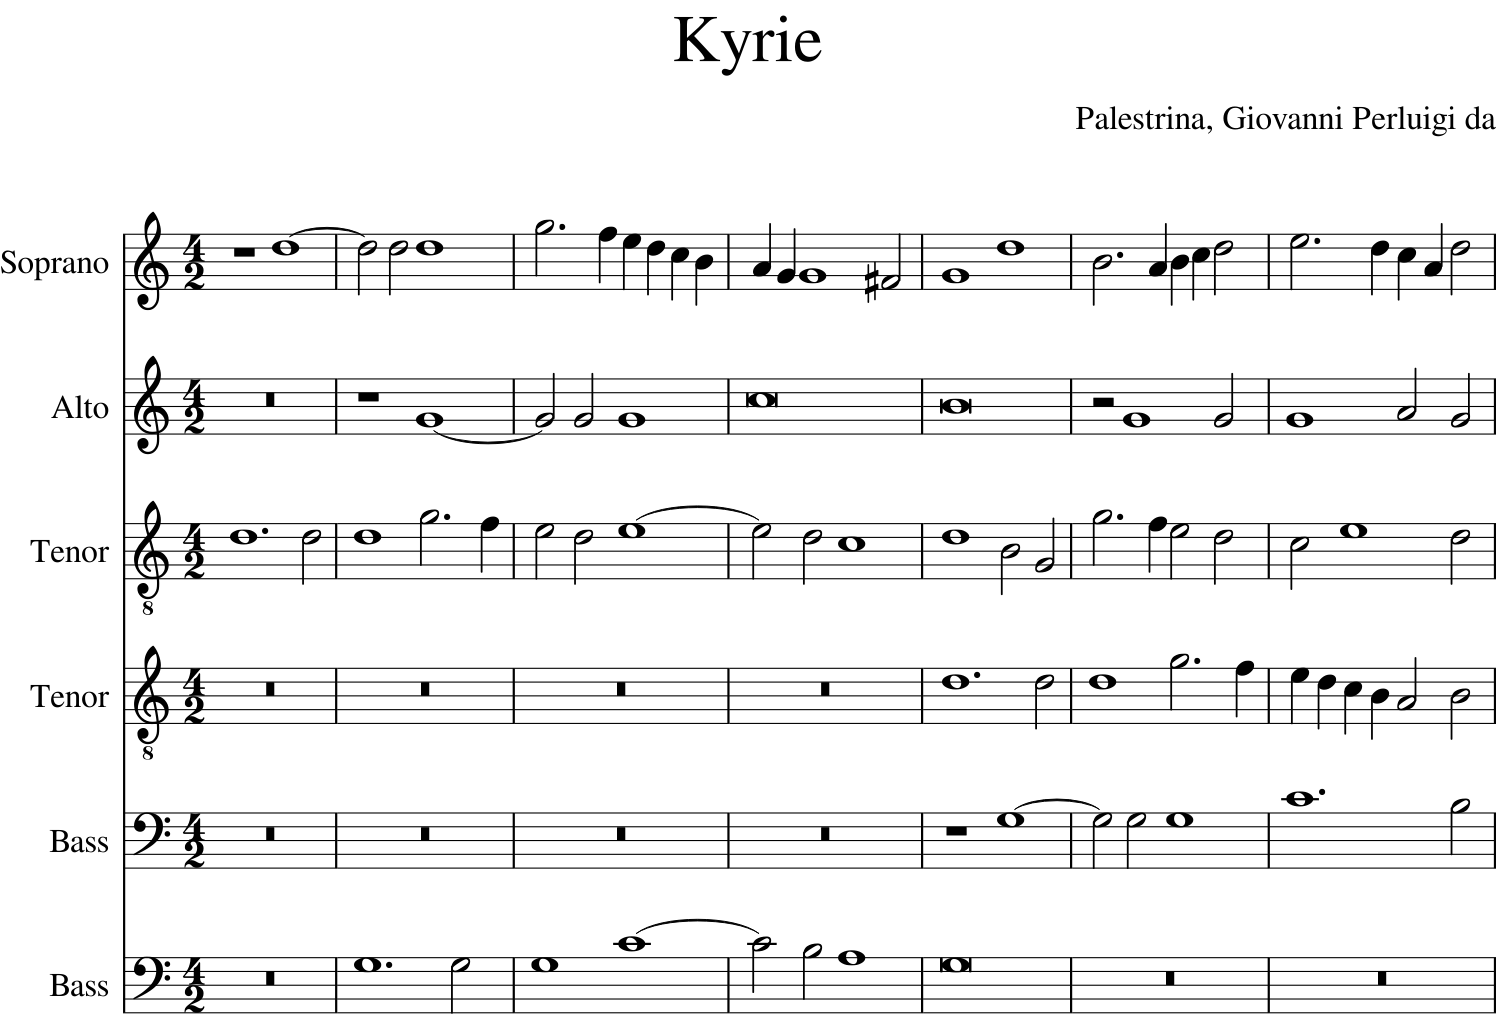

In [10]:
#Let's display the first seven bars of the above entry
ex1 =corpus.parse(corpusPapae[0]) #let's give a name to our object (ex1) and pull up the work that has the name Papae in its title
ex1.measures(1,7).show()

#Do you recognise this famous work by Palestrina?

#### Learning Task 2

Let's try to find other famous masses from the corpus just using the titles.

First, let's see how many masses named Sine Nomine we can find in the corpus. Continue the code below to search within our corpusKyrie object for workks with 'Sine Nomine' as their parent title.

In [11]:
ex3 =  corpusKyrie.search(ParentTitle='???') #fill in the code in the brackets for parentTitle of works to match 'Sine Nomine'
print(ex3)

<music21.metadata.bundles.MetadataBundle {4 entries}>


How many entries have Sine Nomine as their parent title? 

Let's do the same by now searching for works titled 'Missa Brevis'

In [12]:
ex4= corpusKyrie.search(parentTitle ='Missa Brevis')
print(ex4)

<music21.metadata.bundles.MetadataBundle {1 entry}>


Let's create a new object called ex5 to display the first 7 bars of the Missa Brevis.

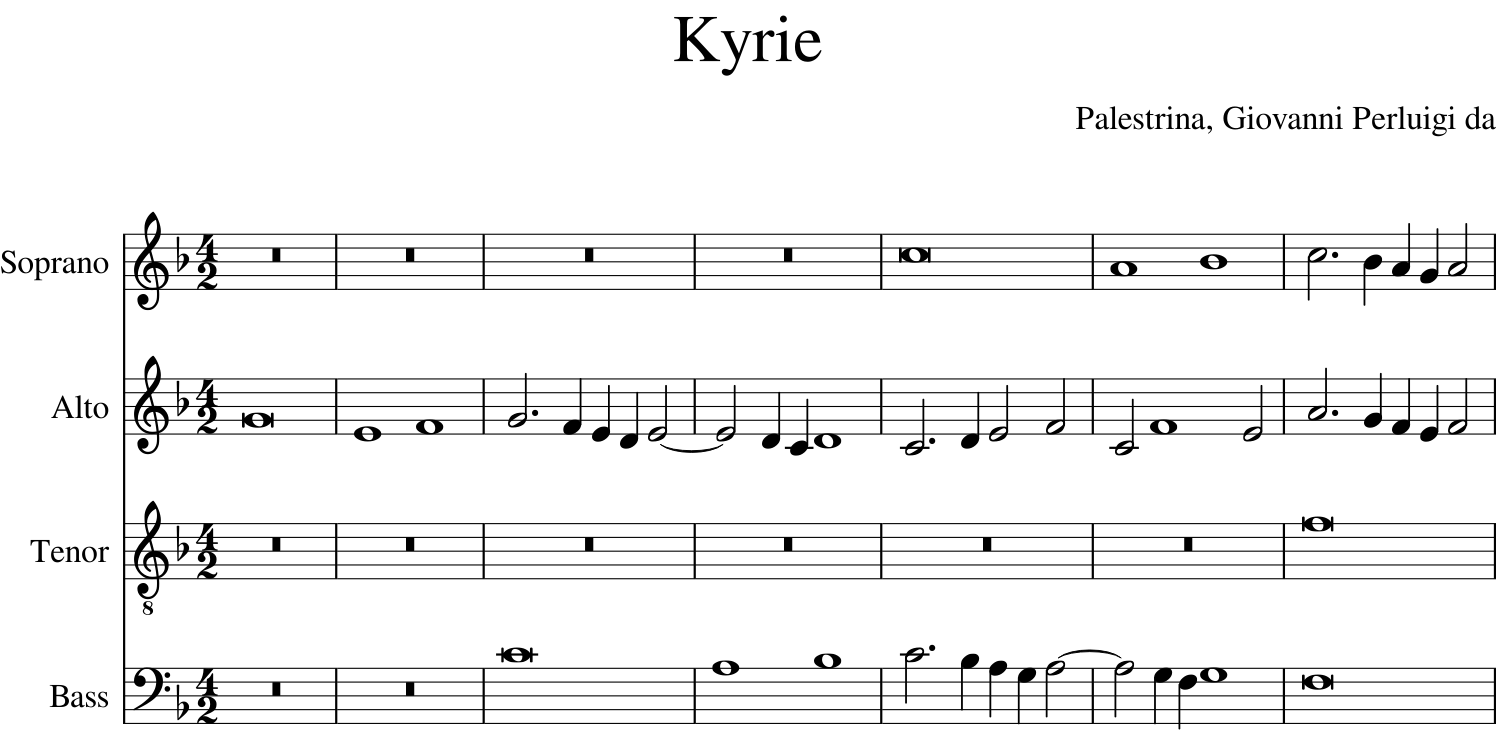

In [13]:
ex5 =corpus.parse(ex4[0]) 
ex5.measures(1,7).show()

We can also display the full titles of particular works by Palestrina. For example, let's find out all the titles of Palestrina's Kyries.

In [14]:
for work in corpusKyrie:
    score = corpus.parse(work)
    print(score.metadata.parentTitle)

Missa Ad fugam
Missa Aeterna Christi munera
Missa Ascendo ad Patrem
Missa Ave Maria (1594)
Missa Ave Maria (1596)
Missa De Beata Marie Virginis (II)
Missa Octavi toni
Missa Panem nostrum
Missa Panis quem ego dabo
Missa Papae Marcelli
Missa Pater noster
Missa Ave regina coelorum
Missa De Beata Marie Virginis (III)
Missa Beatus Laurentius
Missa Benedicta es
Missa Brevis
Missa De Beata Marie Virginis (I)
Missa De beata virgine (1567)
Missa De feria
Missa Dum esset summus pontifex
Missa Descendit angelus Domini
Missa Dies sanctificatus
Missa Dilexi quoniam
Missa Ecce sacerdos magnus
Missa Emendemus in melius
Missa Fratres Ego Enim Accepi
Missa Gabriel Archangelus
Missa Gia fu chi m'ebbe cara
Missa In duplicibus minoribus (I)
Missa In duplicibus minoribus (II)
Missa Sine nomine (1567)
Missa Je suis desheritee
Missa Petra sancta
Missa Primi toni
Missa Qual e il piu grande'amore
Missa Quam pulchra es
Missa Quem dicunt homines
Missa Quinti toni
Missa Regina coeli (1600)
Missa Regina coeli (160

# 3 Corpus analysis of keys

Were the Bach chorales written in specific keys? Perhaps the keys with only one or two sharps and flats were regularly utilised since they are easier to perform and notate? Are there more chorales in major mode than in minor? Let's find out.


## 3.1 Key Distribution

First, let's look at the key distribution across chorales.

In [15]:
# We first select Bach 4-part works in music21
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)
print(chorales) # We print the number of chorales available

<music21.metadata.bundles.MetadataBundle {320 entries}>


In [18]:
# Next we analyse these 320 entries and extract the key from each of them. This will take some time.
from music21 import*
import matplotlib.pyplot as plt # Load some extra plotting libraries

chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)

# For each chorale, it will analyse the key signature of the work and sort them out in major and minor
# A print function is being used so we can see the progress of the command as it's running

dict = {}
dict2 = {}
counter=1; maxlen = len(chorales) 
#maxlen = 10 # if want to limit this to a few chorales, uncomment this line and adjust the number 
for chorale in chorales[0:maxlen]:
   print('Analysing', counter+1,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   key = score.analyze('key').tonicPitchNameWithCase
   key2 = score.analyze('key').mode
   dict[key] = dict[key] + 1 if key in dict.keys() else 1
   dict2[key2] = dict2[key2] + 1 if key2 in dict2.keys() else 1
   counter +=1


Analysing 1 / 10 bwv10.7.mxl ...
Analysing 2 / 10 bwv101.7.mxl ...
Analysing 3 / 10 bwv102.7.mxl ...
Analysing 4 / 10 bwv103.6.mxl ...
Analysing 5 / 10 bwv104.6.mxl ...
Analysing 6 / 10 bwv108.6.mxl ...
Analysing 7 / 10 bwv11.6.mxl ...
Analysing 8 / 10 bwv110.7.mxl ...
Analysing 9 / 10 bwv113.8.mxl ...
Analysing 10 / 10 bwv114.7.mxl ...


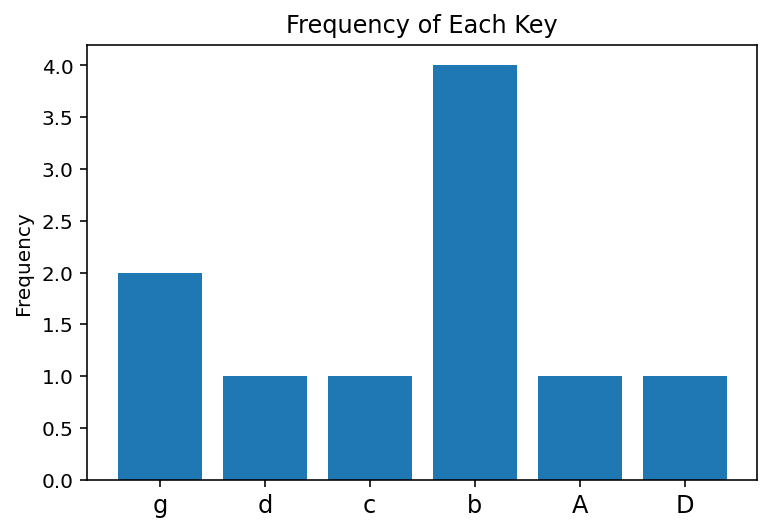

{'minor': 8, 'major': 2}


In [22]:
# Plot the results
ind = [i for i in range(len(dict))]
fig, ax = plt.subplots()
ax.bar(ind, dict.values())
ax.set_title('Frequency of Each Key')
ax.set_ylabel('Frequency')
plt.xticks(ind, dict.keys(), rotation='horizontal',size=12)
plt.show()
print(dict2) # print the frequency of major and minor keys

#### Question number 2

How do you interpret the key data of chorales? Which three key signatures were most frequent in Bach's chorales? 


## 3.2 Clarity of Key

It's good to know that within Bach chorales, there are also some modal chorales and sometimes the definition of the key is ambiguous. In the example above, we analysed the most likely key in each chorale. There are some chorales where the key is ambiguous, which can be explored by obtaining the **tonalCertainty** measure, which underlies the key analysis.

In [24]:
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4) #let's load the Bach chorales again
print(chorales)

#Let's create a loop function that will analyse the chorales in relation to the key signatures and identify the key to which they have the highest correlation
#Do you remember what the correlation coefficient tells us?

c=[]
title=[]
counter=0; maxlen = len(chorales)
maxlen = 10 # if want to limit this to a few chorales, uncomment this line and adjust the number 
for chorale in chorales[0:maxlen]:
   print('Analysing', counter+1,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   tc = score.analyze('key')
   c.append(tc.correlationCoefficient) # get the correlation to the highest key
   title.append(score.metadata.title)
   counter +=1


<music21.metadata.bundles.MetadataBundle {320 entries}>
Analysing 1 / 10 bwv10.7.mxl ...
Analysing 2 / 10 bwv101.7.mxl ...
Analysing 3 / 10 bwv102.7.mxl ...
Analysing 4 / 10 bwv103.6.mxl ...
Analysing 5 / 10 bwv104.6.mxl ...
Analysing 6 / 10 bwv108.6.mxl ...
Analysing 7 / 10 bwv11.6.mxl ...
Analysing 8 / 10 bwv110.7.mxl ...
Analysing 9 / 10 bwv113.8.mxl ...
Analysing 10 / 10 bwv114.7.mxl ...


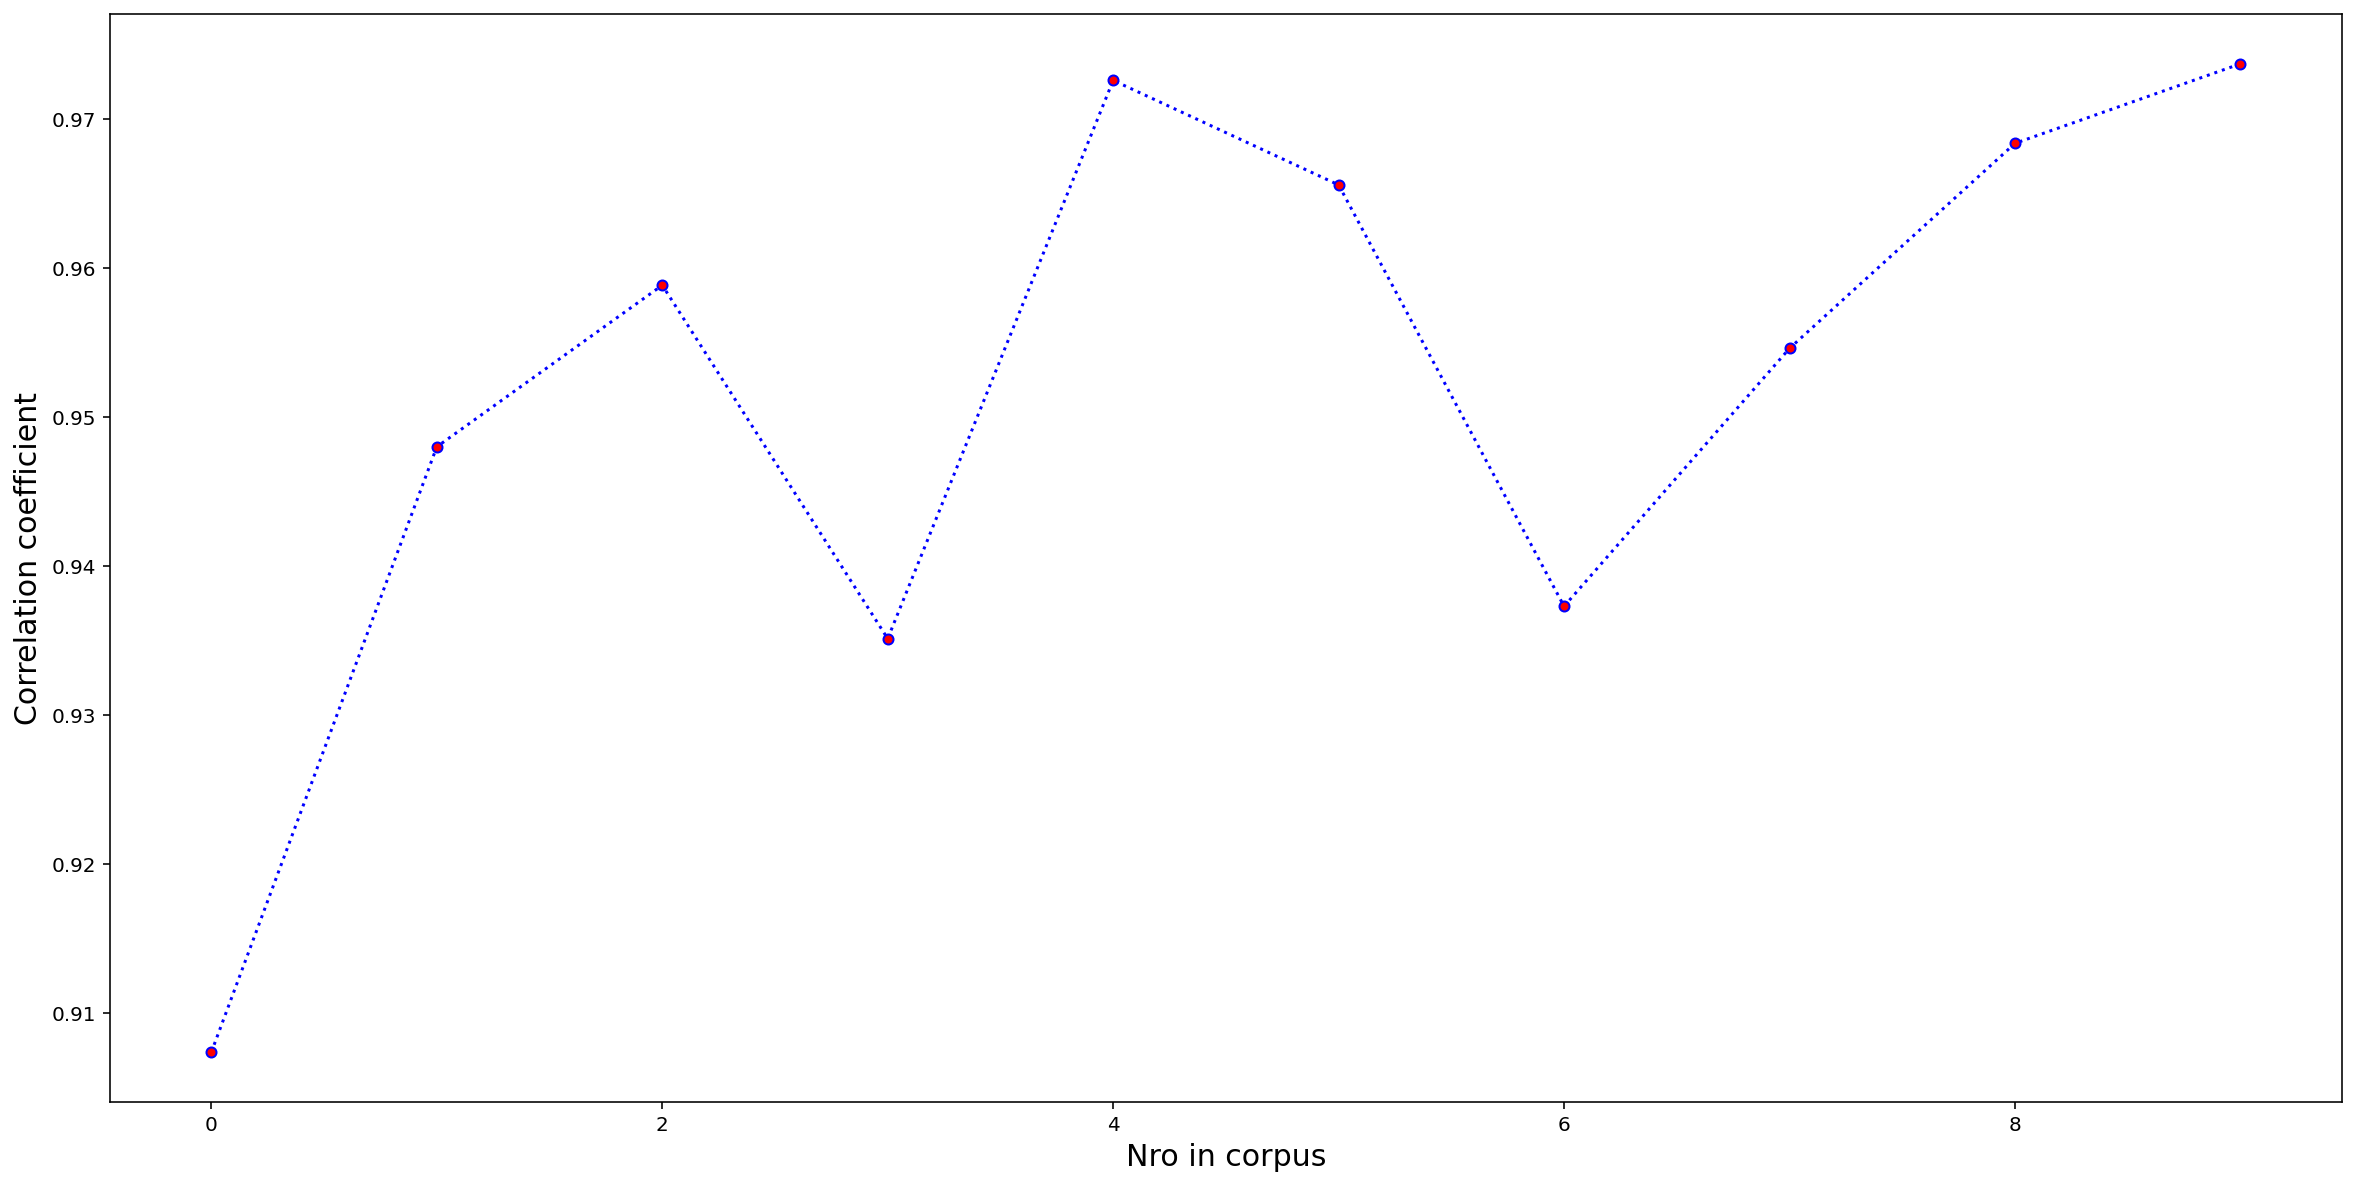

In [25]:
# Let's see what the correlations look like
fig, ax = plt.subplots()
ax.plot(c, 'bo:',markersize=5,markerfacecolor='r')
fig.set_size_inches(20, 10)
ax.set_ylabel('Correlation coefficient',size=15)
ax.set_xlabel('Nro in corpus',size=15)
plt.show()


In [26]:
# There are a few chorales where the correlations are lower than the other chorales, say under 0.85. 
# Let's look at those chorales

ambiguous = [ n for n,i in enumerate(c) if i < 0.85 ] # get indices of tonally ambiguous chorales.
print('Ambiguous keys can be found in:', ambiguous)


Ambiguous keys can be found in: []


In [27]:
# let's look at one of these
score = corpus.parse(chorales[ambiguous[3]])
tc = score.analyze('key')
print(score.metadata.title,':',tc.correlationCoefficient)

IndexError: ignored

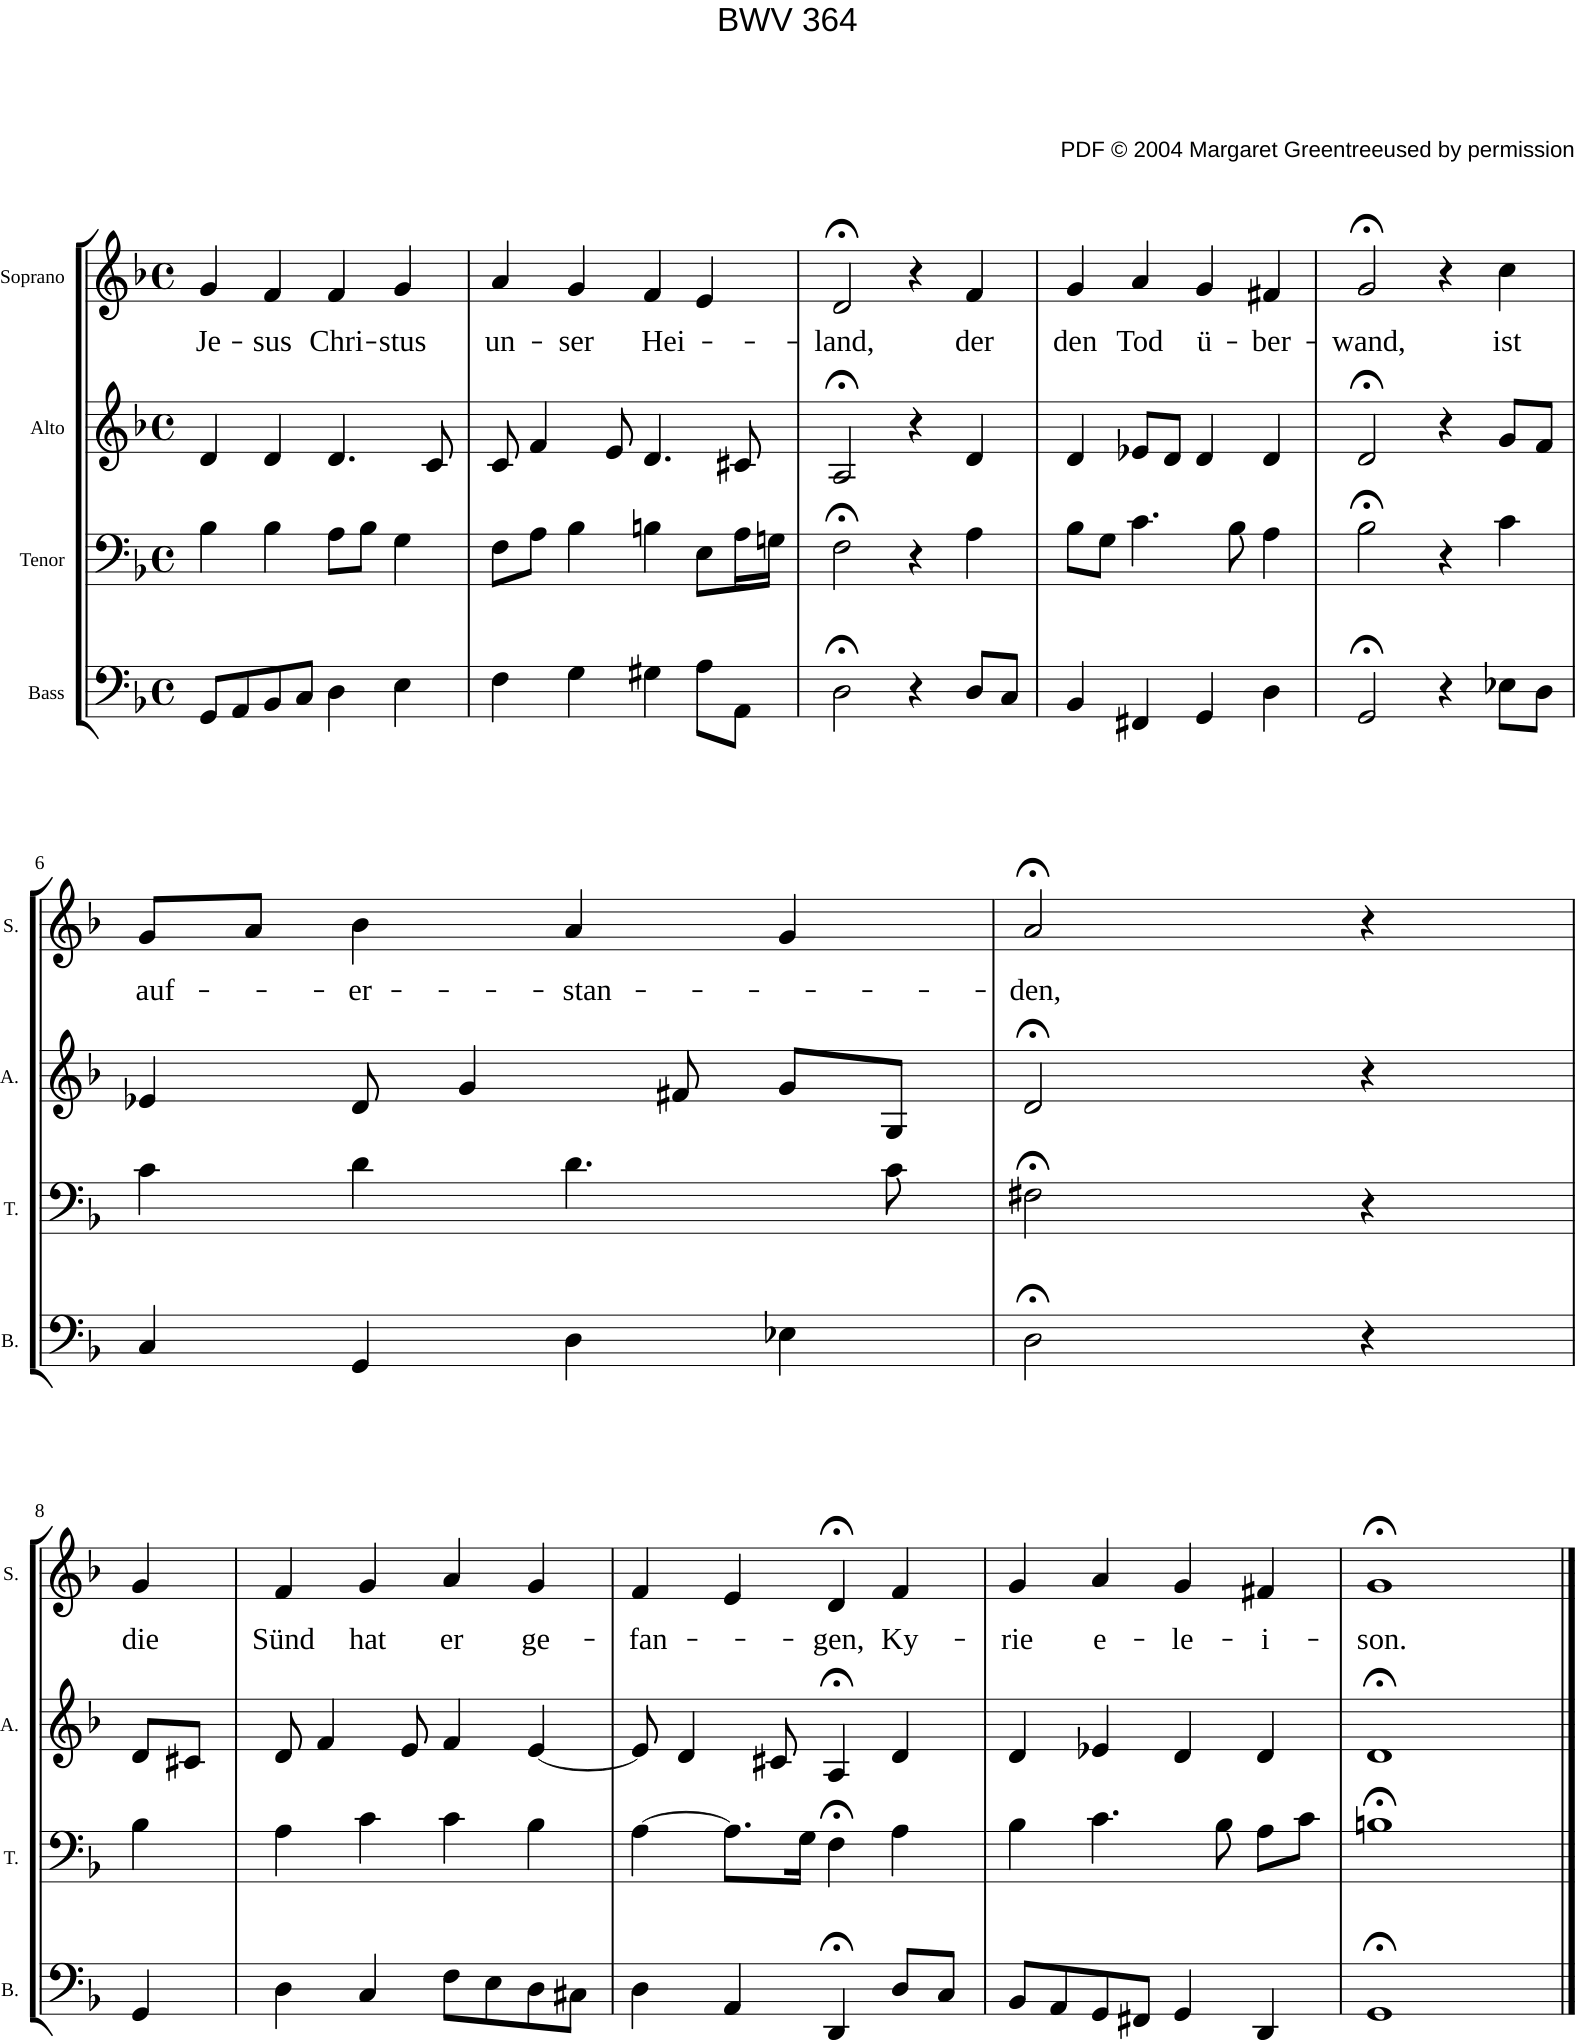

In [ ]:
score.show()

# This is G minor Dorian

### Learning Task 3

Let's now have a look at the works with the highest correlation coefficient. 

In [28]:
# Let's look at the chorales with a coefficient higher than 0.98

totalClarity = [ n for n,i in enumerate(c) if i > 0.98 ] # edit the code to print the number of the works which have a coefficient higher than 0.98
print('Clarity in key can be found in:', totalClarity)

Clarity in key can be found in: []


*How many works have a coefficient higher than 0.98?*

# 4 Corpus analysis of vocal range

Are the basses expected to sing over a larger range than the tenors?

Has the vocal range been the same for SATB works over the centuries? Of course we do not always know what pitch was the score originally mapped onto but at least the vocal ranges should be comparable between soprano, alto, tenor and bass voices.

Let's explore the vocal ranges.

In [29]:
import statistics
# Start with Bach chorales
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)

soprano_range = []
alto_range = []
tenor_range = []
bass_range = []
for chorale in chorales:                                          # Loop across chorales
    s = corpus.parse(chorale)
    for el in s.recurse().parts:                                  # Loop across the parts
        if 'Soprano' in el.partName:
            soprano_range.append(el.analyze('range').semitones)   # Calculate ranges for different voices in semitones
        if 'Alto' in el.partName:
            alto_range.append(el.analyze('range').semitones)
        if 'Tenor' in el.partName:
            tenor_range.append(el.analyze('range').semitones)
        if 'Bass' in el.partName:
            bass_range.append(el.analyze('range').semitones)
# Summarise the results
print('Soprano', round(statistics.mean(soprano_range),2))
print('Alto', round(statistics.mean(alto_range),2))
print('Tenor', round(statistics.mean(tenor_range),2))
print('Bass', round(statistics.mean(bass_range),2))

Soprano 11.79
Alto 11.43
Tenor 12.59
Bass 18.1


Which part had the largest range?

#### Learning Task 4

Are the ranges of the voices specific to the Bach chorales or would similar results be evident in another, polyphonic vocal corpus? Let's try this using Monteverdi's vocal corpus. 

You could try Monteverdi (replace 'J.S. Bach' with 'Monteverdi', change the 'NumberOfParts' to 6).

In [ ]:
import statistics
# Let's get Monteverdi's vocal works
monteverdi = corpus.search(composer='Monteverdi',numberOfParts=6) #change composer to Monteverdi and number of parts to 6

canto_range = []
alto_range = []
tenor_range = []
basso_range = []
for madrigal in monteverdi:                                          # Loop across chorales
    s = corpus.parse(madrigal)
    for el in s.recurse().parts:                                  # Loop across the parts
        #print(el.offset, el, el.analyze('range').semitones)
        #print(el.partName)
        if 'Canto' in el.partName:
            soprano_range.append(el.analyze('range').semitones)   # Calculate ranges for different voices in semitones
        if 'Alto' in el.partName:
            alto_range.append(el.analyze('range').semitones)
        if 'Tenor' in el.partName:
            tenor_range.append(el.analyze('range').semitones)
        if 'Basso' in el.partName:
            bass_range.append(el.analyze('range').semitones)
# Summarise the results
print('Canto', round(statistics.mean(soprano_range),2))
print('Alto', round(statistics.mean(alto_range),2))
print('Tenor', round(statistics.mean(tenor_range),2))
print('Basso', round(statistics.mean(bass_range),2))

Canto 11.84
Alto 16.25
Tenor 16.25
Basso 18.1


# 5 Corpus search

Sometimes the useful approach is not to summarise the entire collection of music in terms of a specific feature but to search for a musical excerpt. Let's search the corpus for a theme that we have in mind. First we will select a suitable corpus of music and then search for a theme with or without the rhythms.

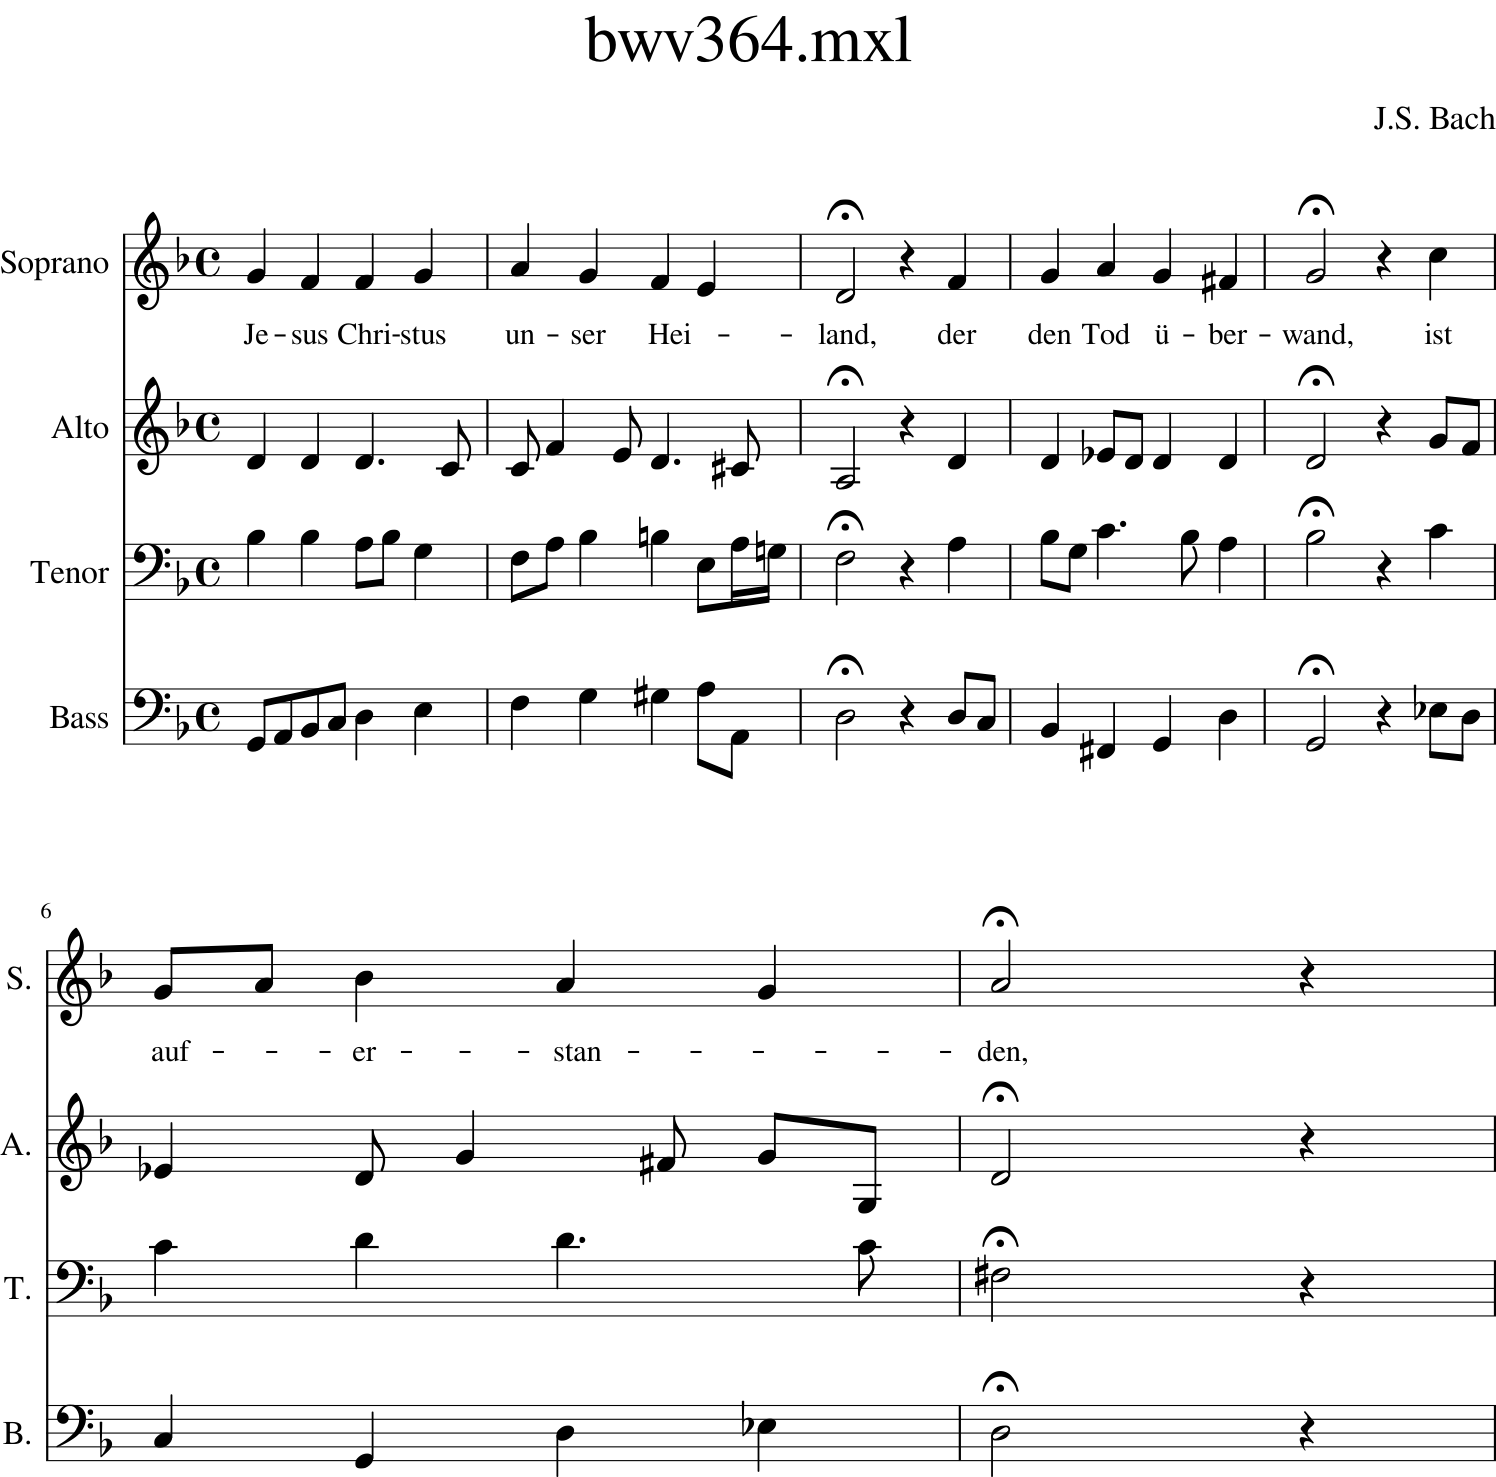

In [33]:
from music21 import *
## Select all Bach Chorales
chorales = corpus.search(composer='J.S. Bach')
chorales2 = corpus.search('bwv364') # Let's get the Dorian chorale again
bwv364=corpus.parse(chorales2[0]) # Put it into a specific variable for convenience
bwv364.measures(0, 9).show() # Display the notation

### 5.1 Theme search (pitch only)

In [31]:
# define a theme to search. Let's first try a simple theme (G F E) without considering the rhythm.
searchList = [note.Note('G'), note.Note('F'), note.Note('E')] # define a search pattern G-F-E
s = bwv364.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchList) # executes the search

# show were the exact matches were
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
# This report below shows in which voice, in which bar and which beat, does the theme occur: 

<music21.note.Note G> 2 2.0 <music21.stream.Part Soprano>
<music21.note.Note G> 8 4.0 <music21.stream.Part Soprano>


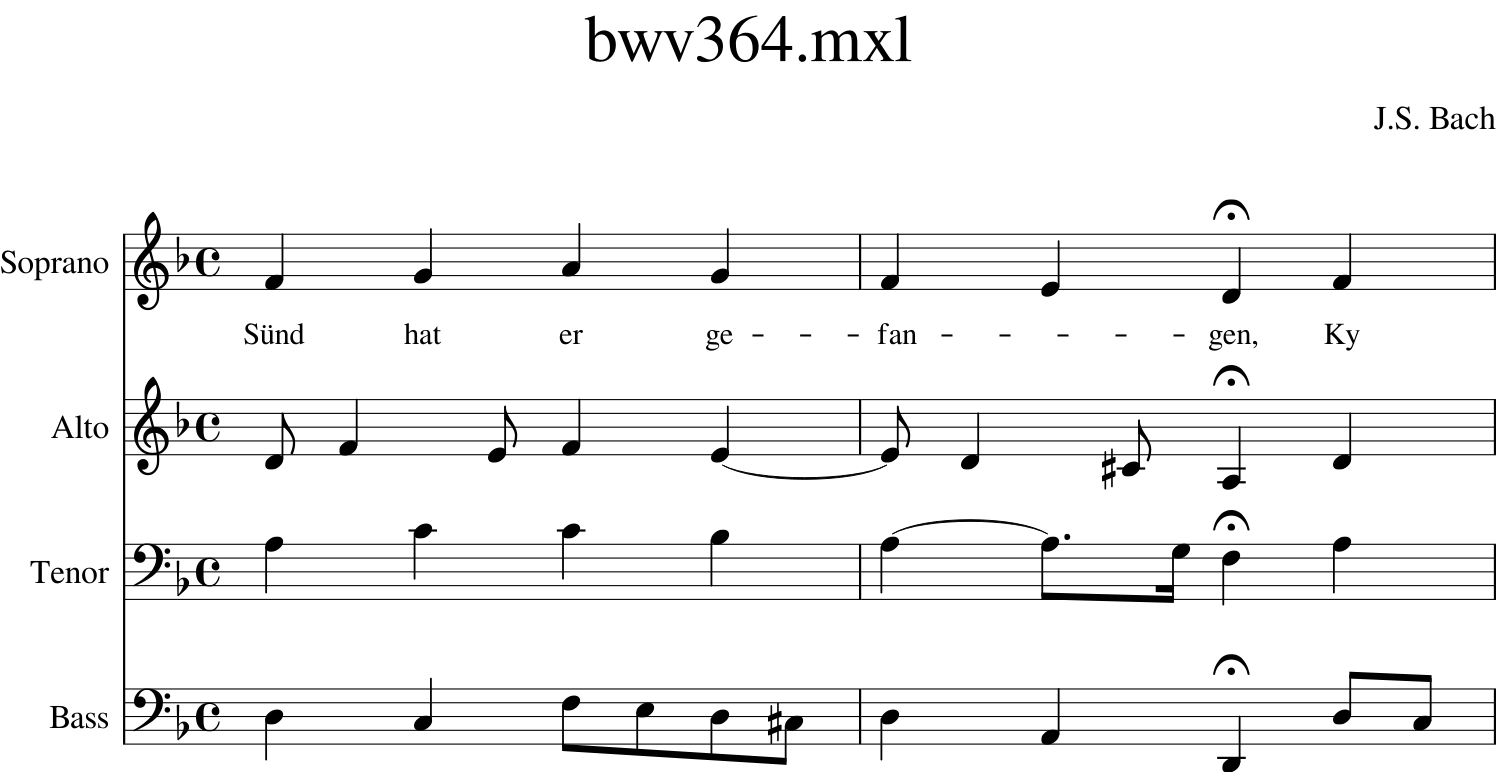

In [34]:
bwv364.measures(8, 9).show()

### 5.2 Theme search (pitch and rhythm)
The search above was simple and unrealistic. Let's search for a real theme with note durations.
Let's find the theme from "Vom Himmel hoch, da komm ich her" ("From Heaven Above to Earth I Come"), which was supposedly composed by Luther in 1539. The theme has been used in Bach's Christmas oratorio, but which chorale does it come from? Here we want to preserve the rhythm as well.

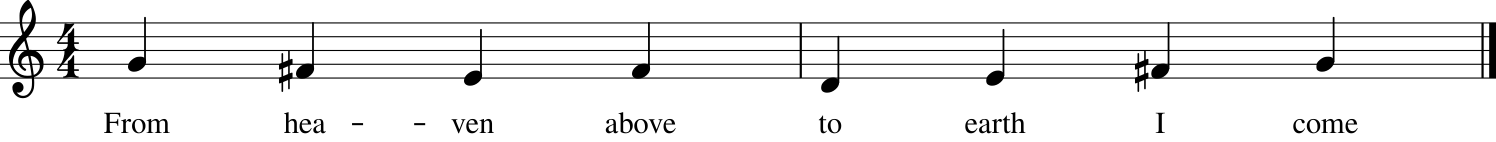

In [35]:
# Define the theme "From Heaven Above to Earth I Come")
theme = converter.parse("tinynotation: 4/4 g4_From f#_hea- e_ven f#_above d_to e_earth f#_I g_come")
theme.show()

In [36]:
# Here we want to preserve the approximate rhythm, but I will make all notes equally long (crotchets).
searchStream2 = stream.Stream([key.KeySignature(1),
                               note.Note('G4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('D4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('G4', type='quarter')])

target1=[]
target2=[]
import time
t = time.time()
for i in range(100): # loop through the first 100 chorales ...
    tmp = chorales[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # loop through different transpositions (up to 12 semitones)
        s2=searchStream2.transpose(unused)
        entryPoints = search.noteNameRhythmicSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    #print(i,target2[i])
    target1=[]
elapsed = time.time() - t
print('Done! This search took',round(elapsed,1),'seconds')

Done! This search took 30.5 seconds


These works contain the theme: [93]


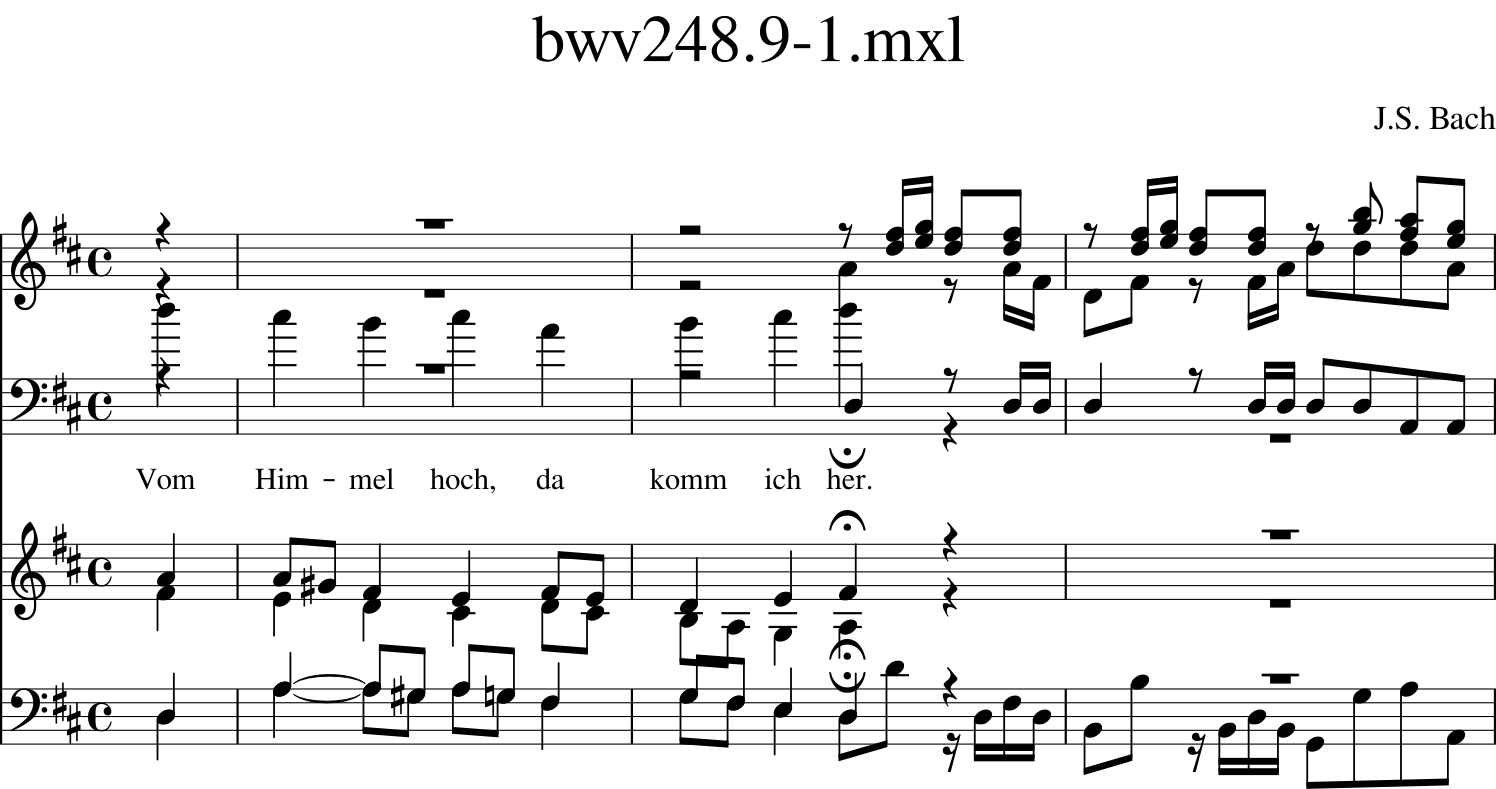

In [37]:
# Display results
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)

catalog = stream.Opus()

for i in range(0,len(hits)):
    tmp=chorales[hits[i]].parse()
    incipit = tmp.measures(0,3)
    catalog.insert(0, incipit.implode())
catalog.show() # Display the works that contain the theme

### 5.3 Search for the same theme in other collections

In [38]:
# Let's see if a similar note pattern has been used in other works such as Palestrina's works.

palestrina = corpus.search('palestrina')
print(palestrina)

# let's allow some rhythmic variations and remove the note durations from the search
searchStream3 = stream.Stream([key.KeySignature(1),
                               note.Note('G4'),
                               note.Note('F#4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('D4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('G4')])
target1=[]
target2=[]
import time
t = time.time()
for i in range(100):
    tmp = palestrina[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # unison to seventh
        s2=searchStream3.transpose(unused)
        entryPoints = search.noteNameSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    print(i,target2[i])
    target1=[]
print('Done! This search took',round(elapsed,1),'seconds')
    
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)


<music21.metadata.bundles.MetadataBundle {1318 entries}>
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 0
12 1
13 0
14 0
15 0
16 0
17 1
18 1
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 2
27 1
28 0
29 0
30 0
31 0
32 0
33 2
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 1
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 1
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
Done! This search took 30.5 seconds
These works contain the theme: [10, 12, 17, 18, 26, 27, 33, 41, 76]


[10, 12, 17, 18, 26, 27, 33, 41, 76]
<music21.note.Note C> 2 1.0 <music21.stream.Part spine_4>
<music21.note.Note C> 5 1.0 <music21.stream.Part spine_1>


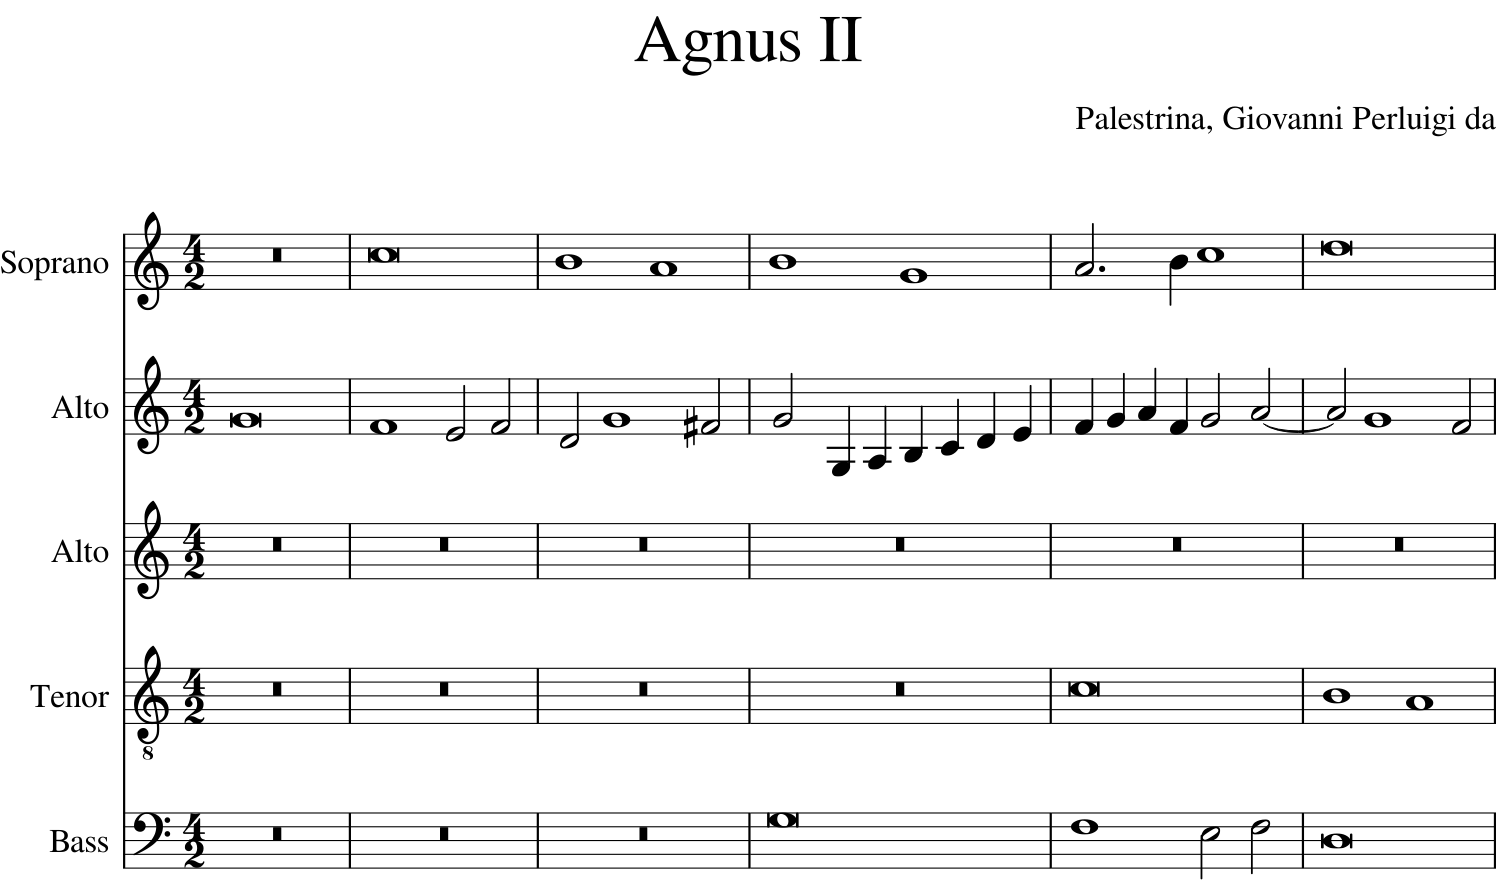

In [46]:
# display one example
print(hits)
tmp=palestrina[hits[6]].parse()        # We are looking at the fifth example in the list above
s = tmp.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchStream3) # executes the search
target1=[]
target2=[]
for unused in range(12): # unison to seventh
    s2=searchStream3.transpose(unused)
    entryPoints = search.noteNameSearch(s, s2.notes)
    len1=len(entryPoints)
    target1.append(len1)
tr=[i for i, x in enumerate(target1) if x]

# show were the exact matches were
s2=searchStream3.transpose(tr[0])
p = search.noteNameSearch(s, s2.notes) # executes the search
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
tmp.measures(1, 6).show()


There are more efficient ways of searching for melodic similarity in `music21`. See [User’s Guide, Chapter 43: Searching in and Among Scores](https://web.mit.edu/music21/doc/usersGuide/usersGuide_43_searching1.html) and [music21.search.segment](https://web.mit.edu/music21/doc/moduleReference/moduleSearchSegment.html) for more clever examples. 


# 6 References

* Cuthbert, M. S., & Ariza, C. (2010). music21: A Toolkit for Computer-Aided Musicology and Symbolic Music Data. In J. Stephen Downie and Remco C. Veltkamp (Eds.). 11th International Society for Music Information Retrieval Conference (ISMIR 2010), August 9-13, 2010, Utrecht, Netherlands. pp. 637-642. [link](http://ismir2010.ismir.net/proceedings/ismir2010-108.pdf)

* Cuthbert, M. S., Ariza, C., & Friedland, L. (2011). Feature Extraction and Machine Learning on Symbolic Music using the music21 Toolkit. In 11th International Society for Music Information Retrieval Conference (ISMIR 2011) (pp. 387--392). [link](http://ismir2011.ismir.net/papers/PS3-6.pdf)
